In [1]:
from sympy import *
init_printing()
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

from mpl_toolkits.mplot3d.axes3d import get_test_data 
from mpl_toolkits.mplot3d import Axes3D 

#we will need this in order to paint vectors
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [2]:
# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] # u = phi, v = theta
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# fixed theta plane
rt, ut = np.mgrid[0:1:50j, 0:2*np.pi:50j] # u = phi 
vt = np.pi/3
xt = rt*np.cos(ut)*np.sin(vt) 
yt = rt*np.sin(ut)*np.sin(vt)
zt = rt*np.cos(vt)
ut1, vt1 = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] #fixed r and theta 
vt1 = 0*vt1 + np.pi/3
xt1 = np.cos(ut1)*np.sin(vt1)  
yt1 = np.sin(ut1)*np.sin(vt1)
zt1 = np.cos(vt1)

# fixed phi plane
rp, vp = np.mgrid[0:1:50j, 0:np.pi:50j]  
up = np.pi/2
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp)
up1, vp1 = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] # fixed r and phi 
up1 = 0*up1 + np.pi/2
xp1 = np.cos(up1)*np.sin(vp1)  
yp1 = np.sin(up1)*np.sin(vp1)
zp1 = np.cos(vp1)

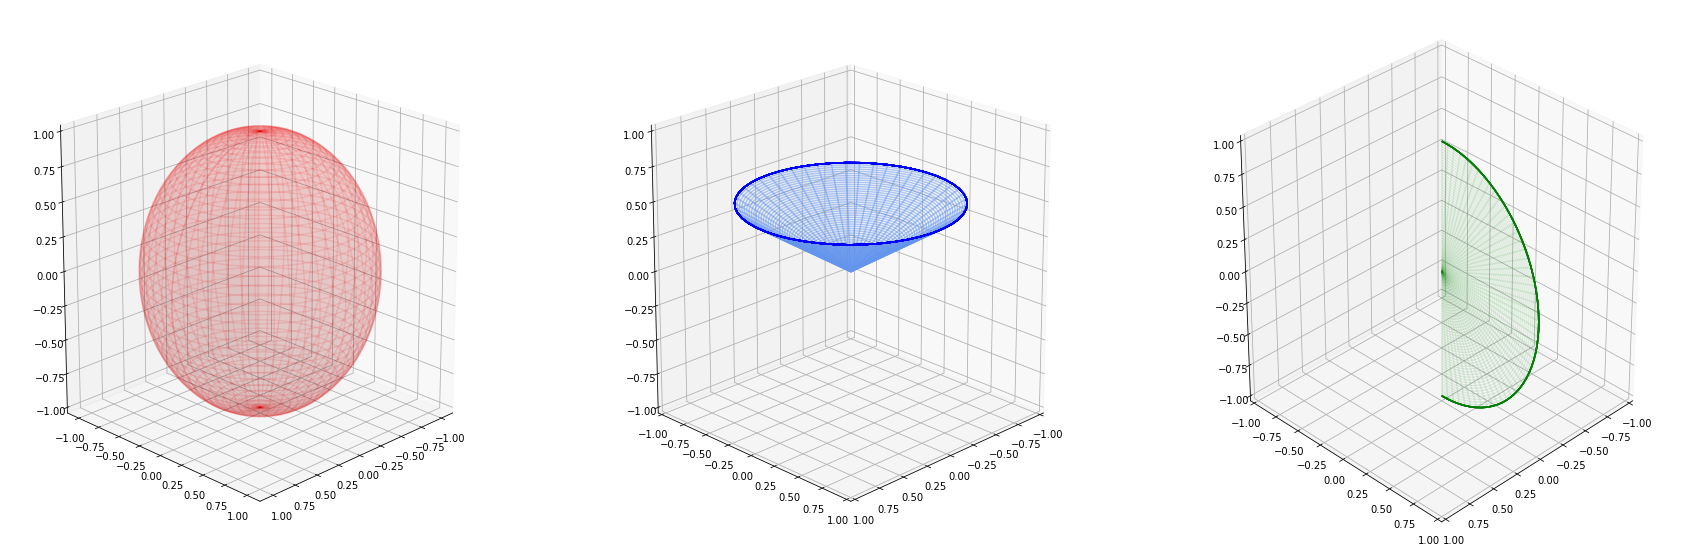

In [3]:
fig = plt.figure(figsize=(30,10)) 

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')

# sphere
fig1 = ax.plot_wireframe(x, y, z, color="r", alpha = 0.1) 
ax.plot_surface(x, y, z, color="r", alpha = 0.1) 
ax.view_init(20, 45)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')

# fixed theta plane
ax.plot_wireframe(xt, yt, zt, color="cornflowerblue", alpha = 0.5)   
ax.plot_wireframe(xt1, yt1, zt1, color="b", alpha = 0.5) 
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(20, 45)

#===============
# Third subplot
#===============
# set up the axes for the third plot
ax = fig.add_subplot(1, 3, 3, projection='3d')

# fixed phi plane
ax.plot_wireframe(xp, yp, zp, color="g", alpha = 0.1)    
ax.plot_wireframe(xp1, yp1, zp1, color="g", alpha = 0.1)    
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.view_init(30, 45)

plt.savefig('./images/coordinates.png')
plt.show()

In spherical coordinates we get that:

Surfaces of the form $r = r_0$ fixed are spheres of radius $r_0$ 

Surfaces of the form $\theta = \theta_0$ fixed, are half-cones at an angle $\theta_0$ form the $z-$axis (plane with $r$ and $\theta$ fixed in dark blue, which corresponds to the plane that cuts the cone of angle theta with the sphere of radius r)

Surfaces of the form $\phi = \phi_0$ fixed, are half-planes at an angle $\phi_0$ form the $x-$axis (plane with $r$ and $\phi$ fixed in dark green, , which corresponds to the half plane that cuts with the sphere of radius r)

### 2 electrons

Lets first define the variables

In [4]:
th1 , phi1, th2 , phi2= symbols('theta_1, phi_1, theta_2, phi_2', positive=True) 
x_1=sin(th1)*cos(phi1)
y_1=sin(th1)*sin(phi1)
z_1=cos(th1)
x_2=sin(th2)*cos(phi2)
y_2=sin(th2)*sin(phi2)
z_2=cos(th2)

The energy given by the Coulomb potential is going to be given by: 
$$ V_{N=2} \equiv V_{2}  = \frac{1}{\mid \mid \bar{r_{1}}-\bar{r_{2}} \mid \mid_{2}}$$

In [5]:
V2 = 1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)

In order to find which tuple of values $(\theta_1,\theta_2,\phi_1,\phi_2)$ minimize the energy, we need to first derivate with respect to each one of the variables and then see which values override the derivatives.

Lets then derivate:

In [6]:
V2_th1=(V2.diff(th1))
V2_th2=(V2.diff(th2))
V2_phi1=(V2.diff(phi1))
V2_phi2=(V2.diff(phi2))

The expressions we get are fairly complicated, so in order to simplify them we are going to multiply yhe equations by the denominator. But we also need to make sure that the denominator is never nule, which only happens if the particles are in the same position. In terms of the variables we impose that $(\theta_1,\phi_1) \neq  (\theta_2,\phi_2)$.

Once we simplify the expressions we get:

In [7]:
A1 = -(V2_th1*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).simplify()
A2 = (V2_th2*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).simplify()
A3 = (V2_phi1*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).factor()
A4 = -(V2_phi2*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).factor()

In [8]:
A1

In [9]:
A2

In [10]:
A3

In [11]:
A4

Since $-sin\phi_1 cos\phi_2 + sin\phi_2 cos\phi_1 = -sin(\phi_1 - \phi_2)$ the las two equations can be rewritten as: $$sin (\theta_1) sin(\theta_2)sin(\phi_1 - \phi_2)=0 $$

Hence, lets solve: $A3 = A4 = sin (\theta_1) sin(\theta_2)sin(\phi_1 - \phi_2)=0$. We have three possible answers:

**Option 1:** $sin(\phi_1 - \phi_2)= 0$, hence $\phi_i = \pi + \phi_j +k\pi$ ($cos(\phi_ 1 - \phi_2) = 1 $). 
Substituting this in A1 and A2 we get that both equal to:
$$ sin(\theta_1)cos(\theta_2)-sin(\theta_2)cos(\theta_1) = sin(\theta_1 - \theta_2 ) = 0 $$ 
hence $\theta_i = \pi + \theta_j +k\pi$.  Therefore: **the electrons are antipodal.**

**Option 2:**  If $sin(\varphi_1 - \varphi_2) \neq 0$ the only possible solution is that $sin(\theta_1)= 0$. Substituting this in A1 and A2 we get: $$
sin(\theta_2)cos(\varphi_1 - \varphi_2)=0 \quad \& \quad sin(\theta_2)=0 $$ 
If we want both of them to be nule, it is neccesary that $sin(\theta_2)= 0$ hence $\theta_i = \pi + k\pi$ for any value of $\varphi_i$. Again, both **electrons are antipodal.**

**Option 3:** If $sin(\varphi_1 - \varphi_2) \neq 0$ we get that the other possible solutions is that  $sin(\theta_2)= 0$.  Totally symmetrical to the previous case.

Let's see how the electrons finally positioned on the surface of the sphere:

Text(0.5, 0, 'z')

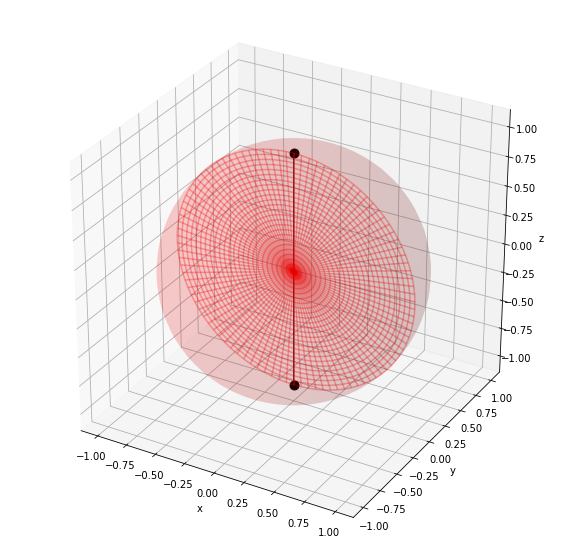

In [12]:
# coordinates of the electrons
phie = [np.pi,2*np.pi] 
thetae = [np.pi,2*np.pi] 

x2 = np.cos(phie[0])*np.sin(thetae[0])
y2 = np.sin(phie[0])*np.sin(thetae[0])
z2 = np.cos(thetae[0]) 

x3 = np.cos(phie[1])*np.sin(thetae[1])
y3 = np.sin(phie[1])*np.sin(thetae[1])
z3 = np.cos(thetae[1])  

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plane where the electrons are positioned
rp, vp = np.mgrid[-1:1:50j, 0:np.pi:50j]  
up = 0
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp) 

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.1)       # sphere 
ax.plot_wireframe(xp, yp, zp, color="r", alpha = 0.3)  # plane 
ax.scatter([x2], [y2], [z2], color="k", s=80)          # electron 1
ax.scatter([x3], [y3], [z3], color="k", s=80)          # electron 2
a = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20,  
            lw=1, arrowstyle="-", color="k")
ax.add_artist(a)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
plt.savefig('./images/position2.png')

### 3 electrons

We need to add one more particle, and hence two more variables to the problem. 

In [13]:
th1 , phi1, th2 , phi2, th3 , phi3 = symbols('theta_1, phi_1, theta_2, phi_2, theta_3, phi_3', positive=True) 
x_3=sin(th3)*cos(phi3)
y_3=sin(th3)*sin(phi3)
z_3=cos(th3)

The energy this time is going to be given by the following expression: $$ V_{N=3} \equiv V_3  =\frac{1}{\parallel \bar{r_{1}}-\bar{r_{2}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{3}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{3}} \parallel_{2}}$$

In [14]:
V3=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2)

Following the previous procedure we minimize the energy as follows:

In [15]:
V3_th1=V3.diff(th1)
V3_th2=V3.diff(th2)
V3_th3=V3.diff(th3)
V3_phi1=V3.diff(phi1)
V3_phi2=V3.diff(phi2)
V3_phi3=V3.diff(phi3)

If we look at the last three equations we have:

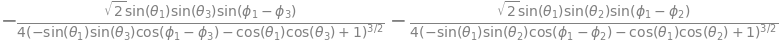

In [16]:
V3_phi1.simplify()

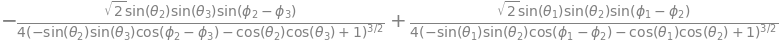

In [17]:
V3_phi2.simplify()

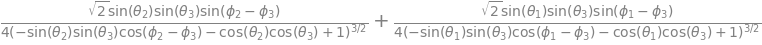

In [18]:
V3_phi3.simplify()

For the last three equations to be zero, a possible solution is $\phi_1 = \phi_2 = \phi_3 = \phi$, which gives us a plane at an angle $ \phi $ from the $ x- $ axis. That means that all three particles need to lie in a plane of the sphere that passes through the origin, i.e: a circumference of maximum radius  inscribed on the sphere. 

Lets substitute this result in the three first equations, and we get:

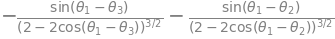

In [19]:
((V3_th1.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

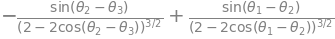

In [20]:
((V3_th2.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

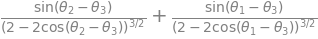

In [21]:
((V3_th3.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

Since  $\phi_1 = \phi_2 = \phi_3 = \phi$, $\theta_1 \neq \theta_2 = \theta_3$ (The denominator will be zero and that is not a solution)

In order to solve this as easy as possible, lets suppose without loss of generality that $\phi_1 = \phi_2 = \phi_3 = 0$ Hence: $sin(\phi) = 0$ and $cos(\phi)=1$. 

Lets fix one of the particles and see where would the other ones position from this one. Since the particles are identical and the rotations invariant we can do this witouth loss of generality. Then, lets suppose that $\theta_1 = 0$. We now get:

In [22]:
x_1 = 0 # sin(th1) = 0
y_1 = 0 # sin(th1) = 0
z_1 = 1 # cos(th1) = 1
x_2 = sin(th2) # cos(phi) = 1
y_2 = 0        # sin(phi) = 0
z_2 = cos(th2) 
x_3 = sin(th3) # cos(phi) = 1
y_3 = 0        # sin(phi) = 0
z_3 = cos(th3)

V3=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2)

Lets now calculate the derivatives

In [23]:
B2=(V3.diff(th2)).simplify()
B3=(V3.diff(th3)).simplify()

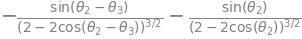

In [24]:
B2

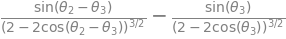

In [25]:
B3

We get two non-linear equations which are fairly difficult to solve. For that reason lets try to solve it graphically.

In [26]:
#The functions f and g will be the previous non-linear equations

def f(x, y):
    f0 = -np.sin(x - y)/((2-2*np.cos(x - y))**(3/2)) - np.sin(x)/((2-2*np.cos(x))**(3/2))
    return f0

def g(x, y):
    g0 = np.sin(y - x)/(2-2*np.cos(y - x))**(3/2) - np.sin(x)/(2-2*np.cos(x))**(3/2)
    return g0

x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)

#lets construct two surfaces Z and Z1 where the points (x,y,z) are (0, pi, f(0,pi)) and (0, pi, g(0,pi)) respectively
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z1 = g(X,Y)

C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


We get some nan values since the function has complex and infinite values at some points.

In order to find the zeros, lets constuct the zero plane (called Z2) with the same "grid" as Z and Z1. Since we are looking for the zeros of the funtions, the values of Z and Z1 that coincide with Z2 will be our solutions. 

In [27]:
Z2 = 0*Z      #we make all the values zero
Z2[Z2 != 0]=0 #we make sure the nan and inf values are also zero 

C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


We are now going to delete all the points of the surfaces given by Z and Z1 that are not null, i.e: that are not equal to Z2 and then plot the result

In [28]:
Z[Z != Z2] = nan
Z1[Z1 != Z2] = nan

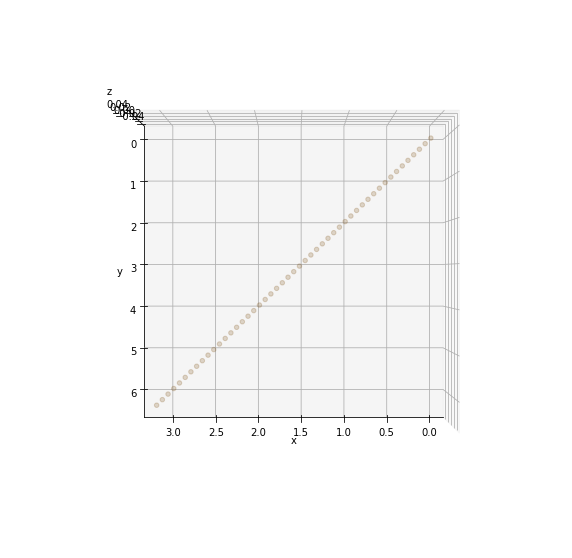

In [29]:
# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# plots 
ax.scatter(X, Y, Z, color='r', alpha = 0.1)  
ax.scatter(X, Y, Z1, color='g', alpha = 0.1)   
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(90, 90) # rotation of the graph to see from the top
plt.savefig('./images/zeros.png')

If we look at the points, we can easily see that they lie in the line $y = 2x$ or equivalently, in our problems notation: $\theta _ 2 = 2 \theta_3$.

But since our three points must lie in the sphere we have the restiction that necessarily $\theta_1 + \theta_2 + \theta_3 = 2\pi$ and since we chose that $\theta_1 = 0$ and we just got that $\theta _ 2 = 2 \theta_3$ we finally get that: $3\theta_2 = 2\pi$. Hence $\theta_2 = \frac{2\pi}{3}$ and $\theta_3 = \frac{4\pi}{3}$. 

To check if our solution is right, lets see if when we substitute in $f(x,y)$ and $g(x,y)$  $x = \frac{2\pi}{3}$ and $y = \frac{4\pi}{3}$ we get zero.

In [30]:
f(2*np.pi/3,4*np.pi/3)

In [31]:
g(2*np.pi/3,4*np.pi/3)

Let's see how the electrons finally positioned on the surface of the sphere:

Text(0.5, 0, 'z')

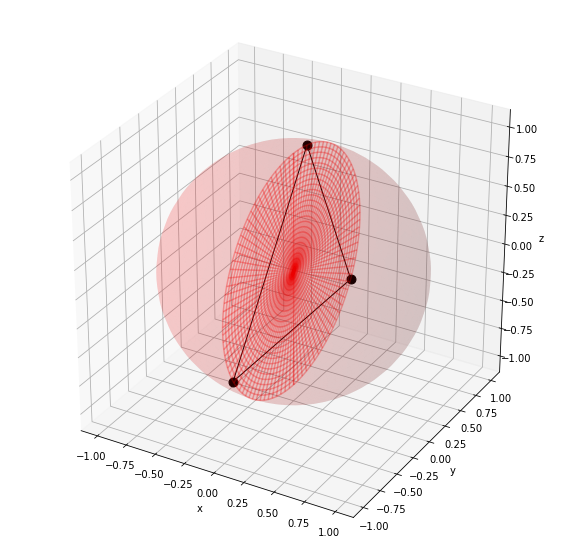

In [32]:
# coordinates of the electrons
phi2 = [np.pi/2]*3
theta2 = [2*np.pi/3,2*np.pi/3+2*np.pi/3,2*np.pi/34*np.pi/3] 

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0]) 

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1]) 

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2]) 

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plane where the electrons are positioned
rp, vp = np.mgrid[-1:1:50j, 0:np.pi:50j]  
up = phi2[0]
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.1)      # sphere
ax.plot_wireframe(xp, yp, zp, color="r", alpha = 0.3) # plane 
ax.scatter([x2], [y2], [z2], color="k", s=80)         # electron 1
ax.scatter([x3], [y3], [z3], color="k", s=80)         # electron 2 
ax.scatter([x4], [y4], [z4], color="k", s=80)         # electron 3
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #side of the equilateral triangle
            lw=1, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20, #side of the equilateral triangle
            lw=1, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20, #side of the equilateral triangle
            lw=1, arrowstyle="-", color="k")
ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
plt.savefig('./images/position3.png')

### 4 electrons

Since, necesarly, three of the electrons will be on the same plane, we can suppose w.l.o.g. that $ \theta_1 = \theta_2 = \theta_3 = \theta $. 

Then, the position of the four electrons are:

In [33]:
th, th4 , phi4, phi2 = symbols('theta, theta_4, phi_4, phi_2', positive=True) 

x_1 = sin(th1)*cos(phi1)
y_1 = sin(th1)*sin(phi1)
z_1 = cos(th1)

x_2 = sin(th)*cos(phi2)
y_2 = sin(th)*sin(phi2)
z_2 = cos(th)

x_3 = sin(th)*cos(phi3)
y_3 = sin(th)*sin(phi3)
z_3 = cos(th)

x_4 = sin(th)*cos(phi4) 
y_4 = sin(th)*sin(phi4) 
z_4 = cos(th) 

With a potential given by:

$$ V_{N=4} \equiv V_4 = V_4  =\frac{1}{\parallel \bar{r_{1}}-\bar{r_{2}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{3}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{4}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{3}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{4}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{3}}-\bar{r_{4}} \parallel_{2}} $$

In [34]:
V4=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2) + 1/sqrt((x_1-x_4)**2+(y_1-y_4)**2+(z_1-z_4)**2) + 1/sqrt((x_4-x_2)**2+(y_4-y_2)**2+(z_4-z_2)**2) + 1/sqrt((x_3-x_4)**2+(y_3-y_4)**2+(z_3-z_4)**2)

Even restricting three particles to be in the same plane, we still having too many variables. The easiest way to simplify this is to first find the coodinates of the particle out of said plane. Therefore, lets find $(\theta_1,\phi_1)$ .

The derivative w.r.t. $\theta_1$ is too complicated, so lets see if we can give a simple answer of the values of $(\theta_1,\phi_1)$ by derivating only w.r.t $\phi_1$

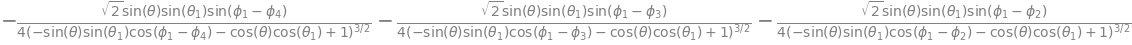

In [35]:
V4_phi1=V4.diff(phi1)
V4_phi1.simplify()

If either $sin\theta = 0$ or $sin\theta_1 = 0$, both of the equation will vanish. Since we want to solve fro the first particle, lets just consider $sin\theta_1 = 0$. Then its coordinates will be: $x_1 =0, y_1=0,z_1=1$, for any $\phi_1$, then, lets just fix it as $\phi_1=0$ and we have:

In [36]:
x_1 = 0
y_1 = 0
z_1 = 1

V4=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2) + 1/sqrt((x_1-x_4)**2+(y_1-y_4)**2+(z_1-z_4)**2) + 1/sqrt((x_4-x_2)**2+(y_4-y_2)**2+(z_4-z_2)**2) + 1/sqrt((x_3-x_4)**2+(y_3-y_4)**2+(z_3-z_4)**2)

Lets calculate the rest of the derivatives

In [37]:
V4_th=V4.diff(th) 
V4_phi2=V4.diff(phi2)
V4_phi3=V4.diff(phi3)
V4_phi4=V4.diff(phi4)

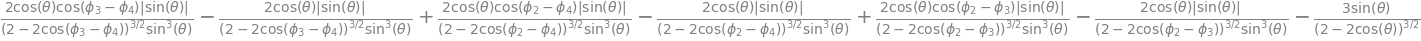

In [38]:
V4_th.simplify()

There is not easy solution w.r.t the angle $\theta$, lets then try to solve for the angles $\phi_i$

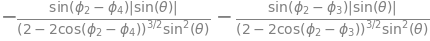

In [39]:
V4_phi2.simplify()

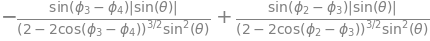

In [40]:
V4_phi3.simplify()

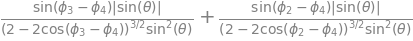

In [41]:
V4_phi4.simplify()

If we compare the previous equations with the one that we obtained in the previous example (for N=3)

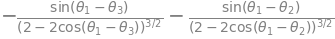

In [42]:
((V3_th1.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

We can see that they have exactly the same form, changing the indexes (the indexes are permuted: (1,2,3) now are (2,3,4)) and changing the variable $\theta$ by $\phi$ and multiplied by a factor: $$ \frac{\mid sin(\theta) \mid}{sin^2(\theta)} = \frac{1}{\mid sin(\theta) \mid}$$

i.e. we get that:
$$ 0 = \frac{\partial V_4}{\partial \varphi_{i+1}} (\varphi_2,\varphi_3,\varphi_4) = \frac{\partial V_3}{\partial \theta_i}(\theta_1,\theta_2,\theta_3)\bigg|_{(\varphi_2,\varphi_3,\varphi_4) } \cdot \frac{1}{\mid sin(\theta) \mid}  \quad \text{con} \quad i\in \left\lbrace 1,2,3 \right\rbrace$$

Which that as long as $sin\theta \neq 0$, the tuple $(\theta_1,\theta_2,\theta_4)$ that nulled the equations V3_th will also be a solution for this case for the variables $(\phi_2,\phi_3,\phi_4)$. Hence:  

$$\phi_2 = 0, \phi_3 = \frac{2\pi}{3}, \phi_4 = \frac{4\pi}{3}$$

If we substitute this values in the coordinates we get

In [43]:
x_1 = 0  
y_1 = 0
z_1 = 1

x_2 = sin(th)
y_2 = 0
z_2 = cos(th)

x_3 = -sin(th)/2
y_3 = np.sqrt(3)*sin(th)/2
z_3 = cos(th)

x_4 = -sin(th)/2
y_4 = -np.sqrt(3)*sin(th)/2
z_4 = cos(th) 

The potential now will be:

In [44]:
V4=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2) + 1/sqrt((x_1-x_4)**2+(y_1-y_4)**2+(z_1-z_4)**2) + 1/sqrt((x_4-x_2)**2+(y_4-y_2)**2+(z_4-z_2)**2) + 1/sqrt((x_3-x_4)**2+(y_3-y_4)**2+(z_3-z_4)**2)

Lets derivate with respect to $\theta$

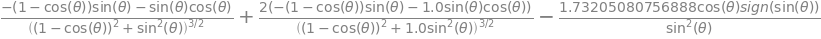

In [45]:
V4.diff(th) 

Hence, the derivative is of the form:
$$ \frac{\partial V_4}{\partial \theta} = 3\frac{-(1-cos(\theta))sin(\theta) - sin(\theta) cos(\theta)}{((1-cos(\theta))^2+sin^2(\theta))^{3/2}} - \frac{\sqrt(3)cos(\theta)}{sin^2(\theta)} $$

Since we can not solve it directly (it is non-linear) lets plot the function to see the roots

In [46]:
from sympy.plotting import plot

In [47]:
x = symbols('x', positive=True) 
h = 3*(-(1-cos(x))*sin(x)-sin(x)*cos(x))/((1-cos(x))**2+sin(x)**2)**(3/2) -np.sqrt(3)*(cos(x))/(sin(x)**2)

Since $\theta \in (0,\pi)$, lets plot it in that interval

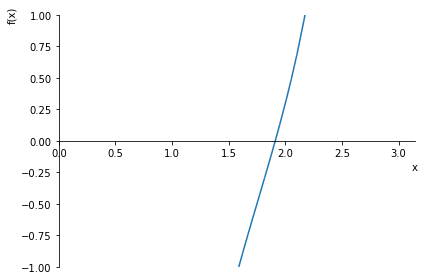

In [48]:
p1 = plot(h, (x,0,np.pi), axis_center = (0,0), ylim = (-1,1), show  = False)
p1.save('./images/root1.png')
p1.show()

The root seems to be in between $(1.8,2)$, lets zoom in that interval

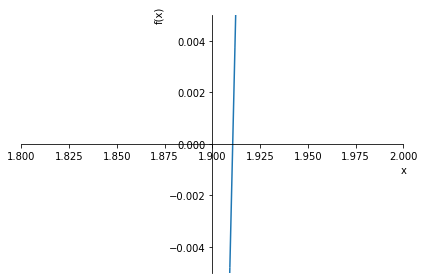

In [49]:
p2 = plot(h, (x,1.80,2), ylim = (-0.005,0.005), show  = False)
p2.save('./images/root2.png')
p2.show()

To be a little more precise, lets zoom in $(1.91,1.92)$

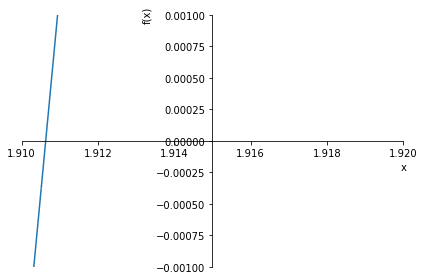

In [50]:
p3 = plot(h, (x,1.91,1.92), ylim = (-0.001,0.001), show  = False)
p3.save('./images/root3.png')
p3.show()

We can conclude that $\theta \approx 1.9105$. Lets see the value of the cosine of this angle (it will define the $z-$coordinate of the electrons 2,3, and 4)

In [51]:
cos(1.9105)

$cos(\theta) \approx −0.333207714034814 \approx -1/3$. If we substitute in the equation $\theta = arccos(-1/3) we finally get that this is the solution.

Then, substituting $\phi_1 = 0, \phi_2 = 0, \phi_3 = \frac{2\pi}{3}, \phi_4 = \frac{4\pi}{3}$ and $\theta = arccos(-1/3) \approx 1.906$, we have that the coordinates of the electrons in the sphere are going to be:
 
 $e_{1}=(0,0,1)$
  
 $e_{2}=({\sqrt {\frac {8}{9}}},0,-{\frac {1}{3}})$, $\phi_2 = 0$

 $e_{3}=(-{\sqrt {\frac {2}{9}}},{\sqrt {\frac {2}{3}}},-{\frac {1}{3}})$, $\phi_3=\frac{2\pi}{3}$

 $e_{4}=(-{\sqrt {\frac {2}{9}}},-{\sqrt {\frac {2}{3}}},-{\frac {1}{3}})$, $\phi_4=-\frac{\pi}{3}$

i.e, a **Tetrahedron** with the edge length of $ \sqrt{\frac {8}{3}}$, lets plot it:

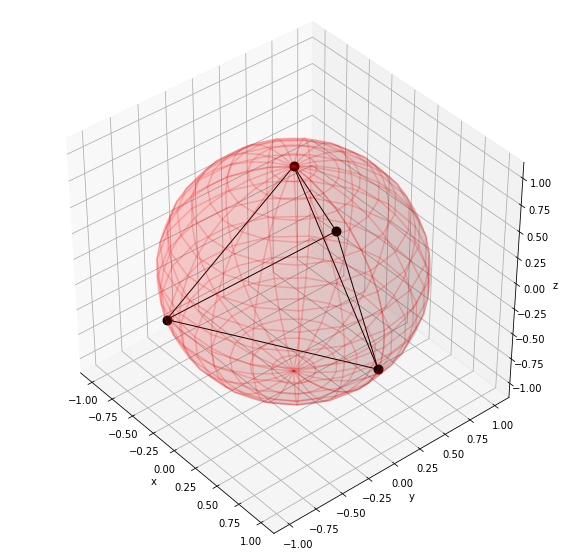

In [52]:
# coordinates of the electrons
phi2 = [0,2*np.pi/3,4*np.pi/3]
theta2 = [np.arccos(-1/3)]*3

x1 = 0 
y1 = 0
z1 = 1

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0])

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1])

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2])

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ux, vx = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
xx = np.cos(ux)*np.sin(vx)
yy = np.sin(ux)*np.sin(vx)
zz = np.cos(vx) 
 

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 

ax.plot_surface(x, y, z, color="r", alpha = 0.1)      # sphere smooth
ax.plot_wireframe(xx, yy, zz, color="r", alpha = 0.2) # sphere lines
ax.scatter([x1], [y1], [z1], color="k", s=80)         # electron 1
ax.scatter([x2], [y2], [z2], color="k", s=80)         # electron 2
ax.scatter([x3], [y3], [z3], color="k", s=80)         # electron 3
ax.scatter([x4], [y4], [z4], color="k", s=80)         # electron 4

a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #Lets plot the sides of Tetrahedron
            lw=1, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20,
            lw=1, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20,
            lw=1, arrowstyle="-", color="k")
a4 = Arrow3D([x2, x1], [y2, y1], [z2, z1], mutation_scale=20,
            lw=1, arrowstyle="-", color="k")
a5 = Arrow3D([x1, x4], [y1, y4], [z1, z4], mutation_scale=20,
            lw=1, arrowstyle="-", color="k")
a6 = Arrow3D([x1, x3], [y1, y3], [z1, z3], mutation_scale=20,
            lw=1, arrowstyle="-", color="k")

ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)
ax.add_artist(a4)
ax.add_artist(a5)
ax.add_artist(a6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(40, -40)
plt.savefig('./images/position4.png')

### 5 electrons

First, without losing the generality, let's consider three of the electrons to be on the same plane, then $ \theta_2 = \theta_3 = \theta_4 = \theta $. But, in this case, even considering this the equations are still fairly complicated, and we can't solve them without making another assumption. From what we've seen so far, it makes sense that the locations of the electrons are as symmetrical as possible from the center of the sphere (actually, in the document we demonstrate that the origin is the centroid of the polygon formed by the distribution of the electrons).

If we were dealing with this from a mathematical point of view, we could also consider the polygon, inscribed on the surface of a sphere, which is formed by the convex hull of the points. In addition, as of now, for any distribution we see that any three points are located on the edges of triangles (since the electrons are identical and have a repulsive potential, it is the distribution that best minimizes the positions). Therefore, it makes sense that we consider the polygon formed by the convex hull of five points with triangular faces, that is, we will consider that the particles can be located on the edges of a bypiramid (two tetrahedra joined by the bases).
 

To solve the equations, and following the above rasoning, let's fix one of the particles. Therefore, let's assume that the first electron is placed at the coordinates $ e_ {1} = (0,0,1) $, that is, it is defined by the variables: $ (\theta_1, \phi_1) = ( 0.0 )$

Then the positions of the four electrons will be given by:

In [53]:
th5 , phi5, phi2 = symbols('theta_5, phi_5, phi_2', positive=True) 

x_1 = 0  
y_1 = 0
z_1 = 1

x_2 = sin(th)*cos(phi2)
y_2 = sin(th)*sin(phi2)
z_2 = cos(th)

x_3 = sin(th)*cos(phi3)
y_3 = sin(th)*sin(phi3)
z_3 = cos(th)

x_4 = sin(th)*cos(phi4) 
y_4 = sin(th)*sin(phi4) 
z_4 = cos(th)

x_5 = sin(th5)*cos(phi5) 
y_5 = sin(th5)*sin(phi5) 
z_5 = cos(th5)

With a potential given by:

$$ V_{N=5} \equiv V_{5} = \sum_{i =1}^N \sum_{i < j}  \frac{1}{\parallel \bar{r_{i}}-\bar{r_{j}} \parallel_{2}} =  \frac{1}{\parallel \bar{r_{1}}-\bar{r_{2}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{3}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{4}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{5}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{3}} \parallel_{2}} +\frac{1}{\parallel \bar{r_{2}}-\bar{r_{4}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{5}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{3}}-\bar{r_{4}} \parallel_{2}}   + \frac{1}{\parallel \bar{r_{3}}-\bar{r_{5}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{4}}-\bar{r_{5}} \parallel_{2}} \nonumber$$


In [54]:
V5=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2) + 1/sqrt((x_1-x_4)**2+(y_1-y_4)**2+(z_1-z_4)**2) + 1/sqrt((x_4-x_2)**2+(y_4-y_2)**2+(z_4-z_2)**2) + 1/sqrt((x_3-x_4)**2+(y_3-y_4)**2+(z_3-z_4)**2) + 1/sqrt((x_1-x_5)**2+(y_1-y_5)**2+(z_1-z_5)**2) + 1/sqrt((x_2-x_5)**2+(y_2-y_5)**2+(z_2-z_5)**2) + 1/sqrt((x_3-x_5)**2+(y_3-y_5)**2+(z_3-z_5)**2) + 1/sqrt((x_4-x_5)**2+(y_4-y_5)**2+(z_4-z_5)**2)

In [55]:
V5_th = V5.diff(th) 
V5_th5 = V5.diff(th5) 
V5_phi2 = V5.diff(phi2)
V5_phi3 = V5.diff(phi3)
V5_phi4 = V5.diff(phi4)
V5_phi5 = V5.diff(phi5)

The derivative wrt $\theta$ is extremly complicated to compute. Thus, we are going find some of the unkowns to reduce this equation as much as possible.

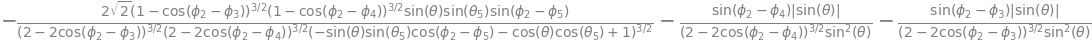

In [56]:
V5_phi2.simplify()

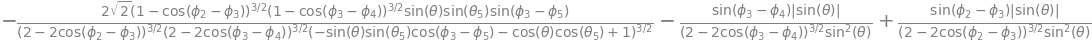

In [57]:
V5_phi3.simplify()

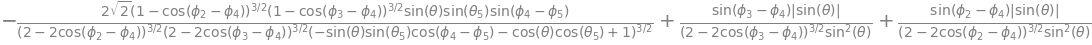

In [58]:
V5_phi4.simplify()

It is clear that this expression can be easily simplified:

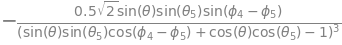

In [59]:
C = 2*sqrt(2)*(1-cos(phi2-phi4))**(3/2)*(1-cos(phi3-phi4))**(3/2)*sin(th)*sin(th5)*sin(phi4 - phi5)/((2-2*cos(phi2-phi4))**(3/2)*(2-2*cos(phi3-phi4))**(3/2)*(1-sin(th)*sin(th5)*cos(phi4-phi5)-cos(th)*cos(th5))**3/2)
C.simplify()

Hence, we can rewrite the previous three expressions as:

$\frac{\partial V_5}{\partial \varphi_i} = -\frac{1}{4}\frac{\sqrt{2} sin(\theta) sin(\theta_5) sin(\phi_i - \phi_5)}{(1-sin(\theta)sin(\theta_5)cos(\phi_i - \phi_5) - cos(\theta)cos(\theta_5))^{1/2} } + \frac{\partial V_4}{\partial \varphi_i} = 0 \quad i  \in \left\lbrace 2,3,4 \right\rbrace$

Lets now derivate wrt $\phi_5$:

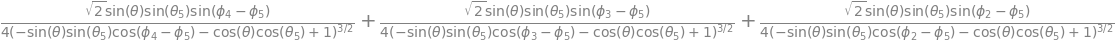

In [60]:
V5_phi5.simplify()

We observe that if $sin(\theta_5)= 0$, the derivative wrt $\phi_5$ is null. Since $\theta_1 = 0$ already, necesarly, $\theta_5 = \pi$, otherwise the position of the first and fith electron would be the same.

When substituting this result in the other equations three equations, we get $\frac{\partial V_5}{\partial \varphi_i} =  \frac{\partial V_4}{\partial \varphi_i} = 0$, where $i \in \left\lbrace 2,3,4 \right\rbrace$. Thus: $\phi_2 = 0, \phi_3 = \frac{2\pi}{3}, \phi_4 = \frac{4\pi}{3}$ as in the previous case.


Hence, we substitute in the potential: $\phi_2 = 0, \phi_3 = \frac{2\pi}{3}, \phi_4 = \frac{4\pi}{3}$ and $\theta_5 =\pi$ and we get that the coordinates and the potential are now given by:

In [61]:
x_1 = 0  
y_1 = 0
z_1 = 1 

x_2 = sin(th)
y_2 = 0
z_2 = cos(th)

x_3 = -sin(th)/2
y_3 = sqrt(3)*sin(th)/2
z_3 = cos(th)

x_4 = -sin(th)/2
y_4 = -sqrt(3)*sin(th)/2
z_4 = cos(th) 

x_5 = 0
y_5 = 0 
z_5 = -1

In [62]:
V5=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2) + 1/sqrt((x_1-x_4)**2+(y_1-y_4)**2+(z_1-z_4)**2) + 1/sqrt((x_4-x_2)**2+(y_4-y_2)**2+(z_4-z_2)**2) + 1/sqrt((x_3-x_4)**2+(y_3-y_4)**2+(z_3-z_4)**2) + 1/sqrt((x_1-x_5)**2+(y_1-y_5)**2+(z_1-z_5)**2) + 1/sqrt((x_2-x_5)**2+(y_2-y_5)**2+(z_2-z_5)**2) + 1/sqrt((x_3-x_5)**2+(y_3-y_5)**2+(z_3-z_5)**2) + 1/sqrt((x_4-x_5)**2+(y_4-y_5)**2+(z_4-z_5)**2)

We only need to find the variable $\theta$, lets proceed as follows

In [63]:
V5_th = V5.diff(th)

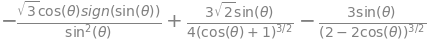

In [64]:
V5_th.simplify()

Lets get the root with the same procedure as in the previous case:

In [65]:
x = symbols('x', positive=True) 
h1 = - np.sqrt(3)*cos(x)/(sin(x)**2) + 3*np.sqrt(2)*sin(x)/(4*(cos(x) + 1)**(3/2)) - 3*sin(x)/(2 - 2*cos(x))**(3/2) 

Since $\theta \in (0,\pi)$, lets plot it in that interval

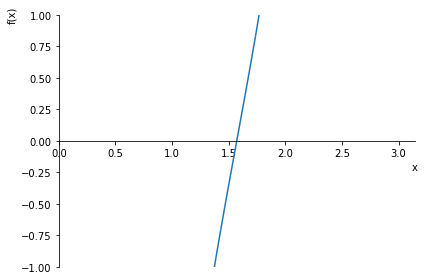

In [66]:
p11 = plot(h1, (x,0,np.pi), axis_center = (0,0), ylim = (-1,1), show  = False)
#p11.save('./images/root11.png')
p11.show()

The root is in the interval $(1.5,1.6)$, lets plot it:

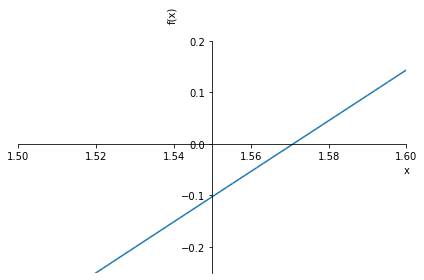

In [67]:
p12 = plot(h1, (x,1.5,1.6), ylim = (-0.25,0.25), show  = False)
p12.save('./images/root12.png')
p12.show() 

We can clearly see that the root is going to be approximately $\theta = 1.57$, since $\frac{\pi}{2} = 1.57079$, it makes sense that this could be the exact root. Lets try:

In [68]:
h1.subs(x,np.pi/2)

Since its numerical, we won't get exactly zero, but we can definitely assure that this is the solution but wWhen we substitute in the equation we actually get that this is the actual root, not an approximation (numpy works numerically, if you do it exactly you get a cero). Hence: 

$$\phi_2 = 0, \phi_3 = \frac{2\pi}{3}, \phi_4 = \frac{4\pi}{3}, \phi_5 = 0, \theta =\frac{\pi}{2} \text{   and   } \theta_5 = \pi$$

So we conclude that the positions will be given by: $e_1 = (0,0,1), e_2 = (1,0,0), e_3 =(-\frac{1}{2}, \frac{\sqrt{3}}{2}, 0), e_4 =(-\frac{1}{2}, -\frac{\sqrt{3}}{2}, 0)$ and $e_5 = (0,0,-1)$, i.e: a triangular bipyramid.

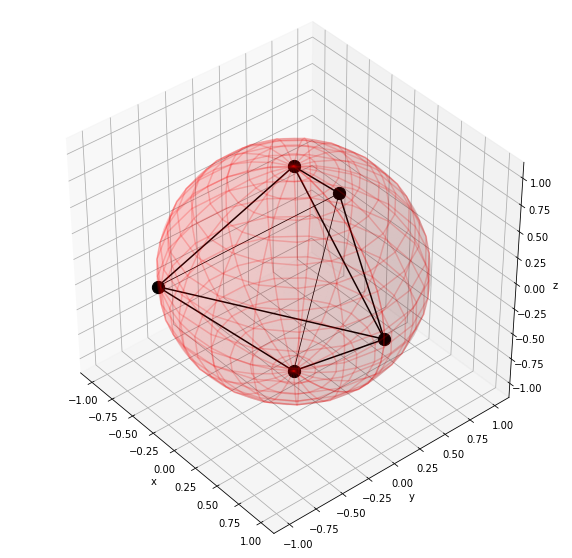

In [69]:
# coordinates of the electrons
phi2 = [0,2*np.pi/3,4*np.pi/3]
theta2 = [np.pi/2]*3

x1 = 0
y1 = 0
z1 = 1

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0])

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1])

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2])

x5 = 0 
y5 = 0
z5 = -1

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
uu, vv = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
xx = np.cos(uu)*np.sin(vv)
yy = np.sin(uu)*np.sin(vv)
zz = np.cos(vv)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.1)       # sphere smooth
ax.plot_wireframe(xx, yy, zz, color="r", alpha = 0.2)  # sphere lines
ax.scatter([x1], [y1], [z1], color="k", s=150)         # electron 1
ax.scatter([x2], [y2], [z2], color="k", s=150)         # electron 2
ax.scatter([x3], [y3], [z3], color="k", s=150)         # electron 3
ax.scatter([x4], [y4], [z4], color="k", s=150)         # electron 4
ax.scatter([x5], [y5], [z5], color="k", s=150)         # electron 4
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #Lets plot the sides of Tetrahedron
            lw=1.5, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20,
            lw=0.75, arrowstyle="-", color="k")
a4 = Arrow3D([x2, x1], [y2, y1], [z2, z1], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a5 = Arrow3D([x1, x4], [y1, y4], [z1, z4], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a6 = Arrow3D([x1, x3], [y1, y3], [z1, z3], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a7 = Arrow3D([x4, x5], [y4, y5], [z4, z5], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a8 = Arrow3D([x2, x5], [y2, y5], [z2, z5], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a9 = Arrow3D([x3, x5], [y3, y5], [z3, z5], mutation_scale=20,
            lw=0.75, arrowstyle="-", color="k")
a10 = Arrow3D([x4, x5], [y4, y5], [z4, z5], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")

ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)
ax.add_artist(a4)
ax.add_artist(a5)
ax.add_artist(a6)
ax.add_artist(a7)
ax.add_artist(a8)
ax.add_artist(a9)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(40, -40)
plt.savefig('./images/position5.png') 